# Hackaton - Math & Stats

## Vesna Pop-Dimitrijoska  &  Ivan Stojkovski

---

# КЛИНИЧКА СТУДИЈА НА НОВ ЛЕК ЗА ТРЕТИРАЊЕ НА ВИСОК КРВЕН ПРИТИСОК

КРВНИОТ ПРИТИСОК е критичен медицински проблем кој се однесува на притисок на крвта врз ѕидовите на крвните садови и е еден од основните витални знаци. Тој може да ги оштети артериите со тоа што ги прави помалку еластични, го намалува протокот на крв и кислород до срцето и доведува до срцеви заболувања. Се менува од макс. (систолен) до мин. (дијастолен).


Др. Игор Панчевски  заедно со тимот во болницата “Тхе Болница” сака да заклучи ДАЛИ ЛЕКОТ ШТО ГО РАЗВИВААТ ИМ ПОМАГА НА ПАЦИЕНТИТЕ? 
100 пациенти со покачен крвен притисок доброволно учествуваа во неколку месечно користење на лекот. 


Следат заклучоци од анализата кои ИНДИЦИРААТ ДЕКА ЛЕКОТ ДЕКА ГО НАМАЛУВА ПОКАЧЕНИОТ ПРИТИСОК.



# Aнализа на податоците и преземени активности:

После анализа на податоците преземени се неколку чекори со цел да се поготви дата сетот за понатамошна работа.

### 1) Анализа на датасет: 
- не содржи дупликати 
- не содржи NaN вредности
- податоците се во соодветниот податочен тип 
- не содржи непотребни колони

### 2) Дополнување на датасетот

Во датасетот е додадена една колона со разлика на мерењата на притисоците пред и после 6 месеци, поради подобра анализа на податоците, но и појасна дистинкција. Со ова е овозможено некој од моделите кои се тестирани да се работат во една димензија што значително ги олеснува алгоритмите за моделирање.

### 3) Финалниот датасет се состои:
 - 2 .csv фајлови 
 - 100 редови со податоци 
 - 4 колони (Мерење 1, Мерење 2, Разлика, Дали примил лек или не).

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from matplotlib.colors import LinearSegmentedColormap

In [2]:
df = pd.read_csv('Prva_zadaca.csv', index_col=0)

display(df)
print()
display(df.info())

,Merenje 1,Merenje 2,Primil lek ili ne
0,151.354987,128.022177,1
1,140.893229,142.951676,0
2,149.398011,123.352114,1
3,145.447638,144.392613,0
4,146.130695,111.255393,1
...,...,...,...
95,171.349918,176.539961,0
96,137.475245,117.997604,1
97,162.832752,165.922771,0
98,138.662686,97.664238,1



<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Merenje 1          100 non-null    float64
 1   Merenje 2          100 non-null    float64
 2   Primil lek ili ne  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


None

In [3]:
# Adding one column with difference between the Blood Pressure
df['Razlika'] = df['Merenje 1'] - df['Merenje 2']

print("\nДескриптивна статистика на податоците на целиот дата сет:")
display(df[['Merenje 1', 'Merenje 2', 'Razlika']].describe())

print("\nДескриптивна статистика на податоците на лицата кои ГО ПРИМИЛЕ лекот:")
display(df[df["Primil lek ili ne"] == 1][['Merenje 1', 'Merenje 2', 'Razlika']].describe())

print("\nДескриптивна статистика на податоците на лицата кои НЕ ГО ПРИМИЛЕ лекот:")
display(df[df["Primil lek ili ne"] == 0][['Merenje 1', 'Merenje 2', 'Razlika']].describe())


# Listing outliers with the z-score
a = pd.DataFrame(df['Merenje 1']) 
mi = a.mean()
sigma = a.std()
z = (a - mi) / sigma
a['z_score'] = z
a['Outlier'] = abs(z) > 3
display(a.loc[a['Outlier']==True])

b = pd.DataFrame(df['Merenje 2']) 
mi = b.mean()
sigma = b.std()
z = (b - mi) / sigma
b['z_score'] = z
b['Outlier'] = abs(z) > 3
display(b.loc[b['Outlier']==True])

c = pd.DataFrame(df['Razlika']) 
mi = c.mean()
sigma = c.std()
z = (c - mi) / sigma
c['z_score'] = z
c['Outlier'] = abs(z) > 3
display(c.loc[c['Outlier']==True])


Дескриптивна статистика на податоците на целиот дата сет:


,Merenje 1,Merenje 2,Razlika
count,100.000000,100.000000,100.000000
mean,149.383047,133.534419,15.848629
std,11.442346,22.500510,18.485553
min,119.488833,82.505925,-7.175558
25%,140.149544,116.704885,0.757707
50%,150.708728,137.011075,7.175732
75%,158.317202,151.804897,28.453727
max,171.349918,176.539961,72.162288



Дескриптивна статистика на податоците на лицата кои ГО ПРИМИЛЕ лекот:


,Merenje 1,Merenje 2,Razlika
count,50.000000,50.000000,50.000000
mean,147.655433,116.170331,31.485101
std,11.031656,16.286455,13.255571
min,119.488833,82.505925,2.999655
25%,139.066614,105.621257,22.606516
50%,148.346144,116.652595,28.594913
75%,154.720659,125.137700,37.235435
max,167.308936,153.017268,72.162288



Дескриптивна статистика на податоците на лицата кои НЕ ГО ПРИМИЛЕ лекот:


,Merenje 1,Merenje 2,Razlika
count,50.000000,50.000000,50.000000
mean,151.110662,150.898506,0.212156
std,11.693501,11.928946,3.964450
min,124.124567,125.428249,-7.175558
25%,140.756809,141.671721,-3.023243
50%,152.422849,151.078483,0.704227
75%,161.568132,161.247244,3.294587
max,171.349918,176.539961,7.356293


,Merenje 1,z_score,Outlier


,Merenje 2,z_score,Outlier


,Razlika,z_score,Outlier
28,72.162288,3.04636,True


In [4]:
# Kreiranje na df koi se koristat vo ponatamosnata analiza
df1 = df[['Merenje 1', 'Primil lek ili ne']]
df2 = df[['Merenje 2', 'Primil lek ili ne']]

df1_1 = df[df["Primil lek ili ne"] == 1]['Merenje 1']
df1_0 = df[df["Primil lek ili ne"] == 0]['Merenje 1']

df2_1 = df[df["Primil lek ili ne"] == 1]['Merenje 2']
df2_0 = df[df["Primil lek ili ne"] == 0]['Merenje 2']

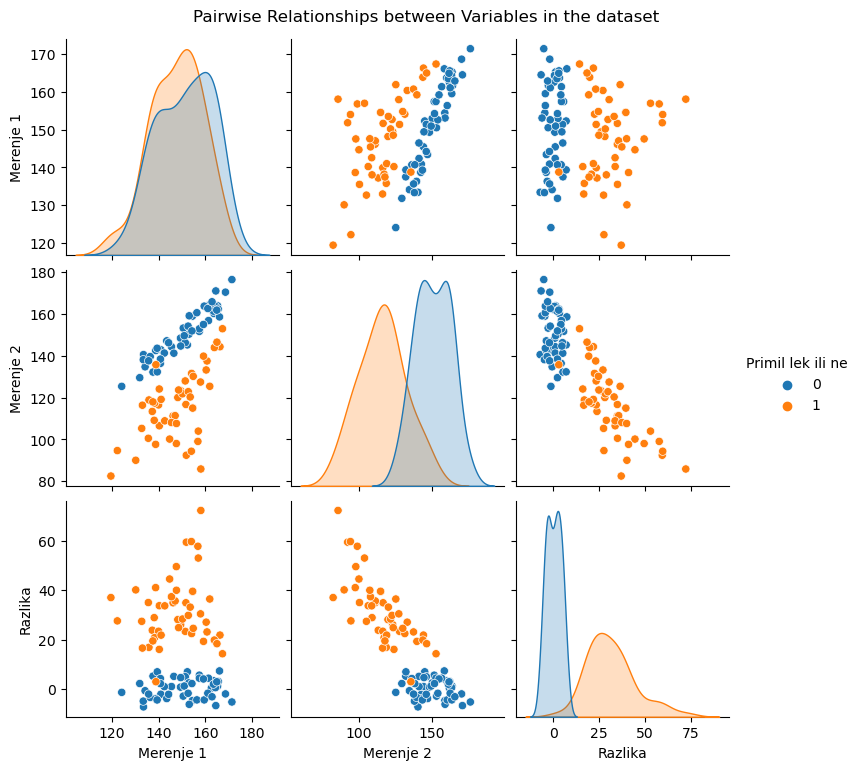

In [5]:
# Create a pair plot using Seaborn to visualize relationships between variables
sns.pairplot(df, hue='Primil lek ili ne')
plt.suptitle("Pairwise Relationships between Variables in the dataset", y=1.02, fontsize=12)
plt.show()

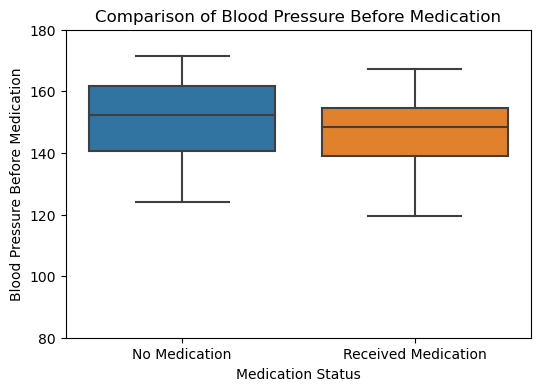

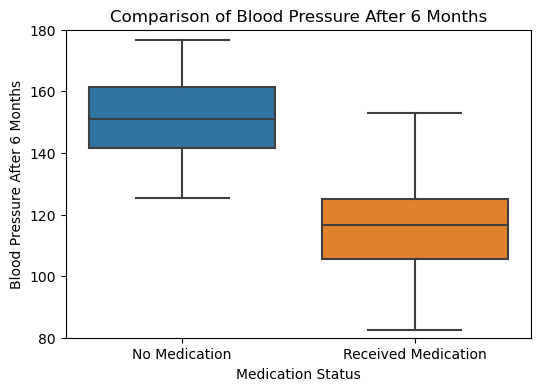

In [6]:
# Set the same y-axis limits for both plots
y_axis_limits = (80, 180)

# Box plot to compare blood pressure measurements before and after medication
plt.figure(figsize=(6, 4))
sns.boxplot(x='Primil lek ili ne', y='Merenje 1', data=df)
plt.xticks([0, 1], ['No Medication', 'Received Medication'])
plt.xlabel('Medication Status')
plt.ylabel('Blood Pressure Before Medication')
plt.title('Comparison of Blood Pressure Before Medication')
plt.ylim(y_axis_limits)  # Set y-axis limits
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Primil lek ili ne', y='Merenje 2', data=df)
plt.xticks([0, 1], ['No Medication', 'Received Medication'])
plt.xlabel('Medication Status')
plt.ylabel('Blood Pressure After 6 Months')
plt.title('Comparison of Blood Pressure After 6 Months')
plt.ylim(y_axis_limits)  # Set y-axis limits
plt.show()

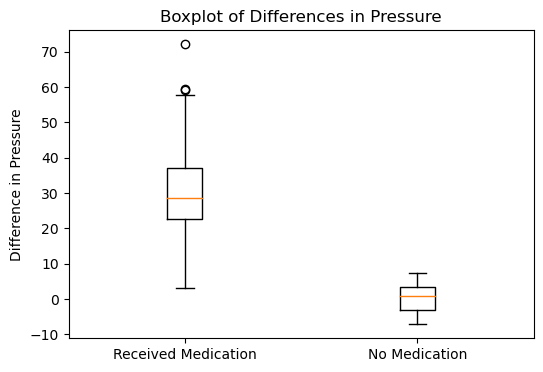

In [7]:
# Assuming you have already loaded the data and performed the initial data processing
df1 = df[df['Primil lek ili ne'] == 1]
df2 = df[df['Primil lek ili ne'] == 0]

diff1 = df1['Merenje 1'] - df1['Merenje 2']
diff2 = df2['Merenje 1'] - df2['Merenje 2']

# Visualize differences using boxplots
plt.figure(figsize=(6, 4))
plt.boxplot([diff1, diff2], labels=['Received Medication', "No Medication"])
plt.title('Boxplot of Differences in Pressure')
plt.ylabel('Difference in Pressure')
plt.show()

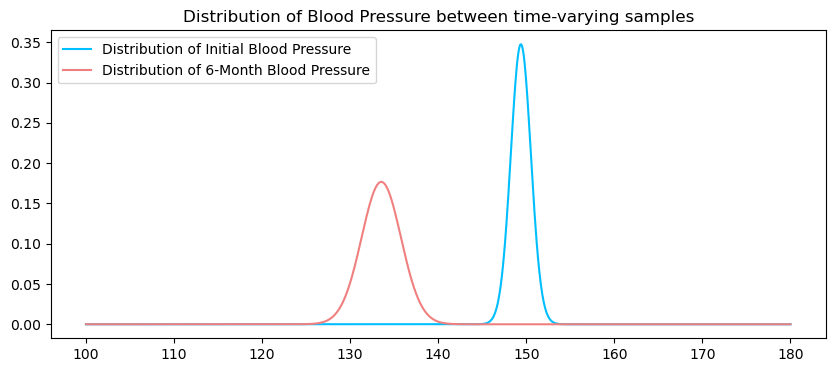

p-value = 3.643033269815961e-09
----------------------------------------------------------------------------------------------------
ЗАКЛУЧОК: Се отфрла H0 во корист на Ha, што значи дека ПОСТОИ разлика помеѓу примероците за P пред и после 6 месеци.


In [8]:
# в-1) Заклучете дали постои разлика на измерен крвен притисок на пациентите прв ден и измерен крвен притисок на 
#      пациенти последен ден

# ХИПОТЕЗА
# H0: НЕ ПОСТОИ РАЗЛИКА помеѓу примероците за P пред и после 6 месеци  =>  mean1 = mean0  
# Ha: ПОСТОИ РАЗЛИКА помеѓу примероците за P пред и после 6 месеци     =>  mean1 ≠ mean0 
# --------------------------------------------------------------------------------------------------

mean1 = df['Merenje 1'].mean()
mean0 = df['Merenje 2'].mean()

std1 = df['Merenje 1'].std()
std0 = df['Merenje 2'].std()

n = df['Merenje 1'].size

std_error1 = std1 / np.sqrt(n)
std_error0 = std0 / np.sqrt(n)

T1 = stats.t(df = n-1, loc = mean1, scale = std_error1)
T0 = stats.t(df = n-1, loc = mean0, scale = std_error0)

xs = np.linspace(100, 180, 1000)
plt.figure(figsize=(10, 4))
plt.plot(xs, T1.pdf(xs), label='Distribution of Initial Blood Pressure', color='deepskyblue')
plt.plot(xs, T0.pdf(xs), label='Distribution of 6-Month Blood Pressure', color='lightcoral')
plt.title('Distribution of Blood Pressure between time-varying samples')
plt.legend()
plt.show()

statistic, pvalue = stats.ttest_ind(df['Merenje 1'], df['Merenje 2'], alternative = 'two-sided', equal_var = False)

print('p-value =', pvalue)
print('----------------------------------------------------------------------------------------------------')

if pvalue < 0.05:
    print('ЗАКЛУЧОК: Се отфрла H0 во корист на Ha, што значи дека ПОСТОИ разлика помеѓу примероците за P пред и после 6 месеци.')
else:
    print('ЗАКЛУЧОК: Се прифаќа H0, што значи дека НЕ ПОСТОИ разлика помеѓу примероците за P пред и после 6 месеци.')


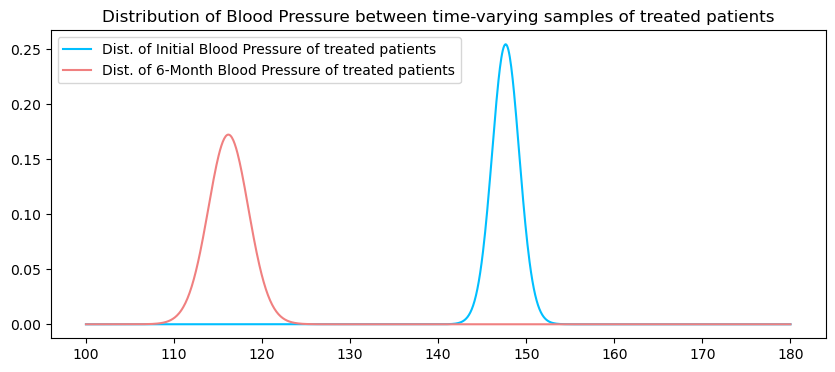

p-value = 9.979494526655533e-19
----------------------------------------------------------------------------------------------------
ЗАКЛУЧОК: Се отфрла H0 во корист на Ha, што значи дека ПОСТОИ разлика помеѓу примероците за P пред и после 6 месеци кај третирани пациенти.


In [9]:
# в-2) Заклучете дали постои намалување (или зголемување) на притисокот кај пациенти кои примиле лек во првиот ден од 
#      мерењето и на крајот од 6 месеци.

# ХИПОТЕЗА
# H0: НЕ ПОСТОИ РАЗЛИКА помеѓу примероците за P  пред и после 6 месеци кај третирани пациенти  =>  mean1 = mean2  
# Ha: ПОСТОИ РАЗЛИКА помеѓу примероците за P пред и после 6 месеци кај третирани пациенти      =>  mean1 ≠ mean2 
# --------------------------------------------------------------------------------------------------

df1 = df[df["Primil lek ili ne"] == 1]['Merenje 1']
df2 = df[df["Primil lek ili ne"] == 1]['Merenje 2']

mean1 = df1.mean()
mean2 = df2.mean()

std1 = df1.std()
std2 = df2.std()

n = df1.size

std_error1 = std1 / np.sqrt(n)
std_error2 = std2 / np.sqrt(n)

T1 = stats.t(df = n-1, loc = mean1, scale = std_error1)
T2 = stats.t(df = n-1, loc = mean2, scale = std_error2)

xs = np.linspace(100, 180, 1000)
plt.figure(figsize=(10, 4))
plt.plot(xs, T1.pdf(xs), label='Dist. of Initial Blood Pressure of treated patients', color='deepskyblue')
plt.plot(xs, T2.pdf(xs), label='Dist. of 6-Month Blood Pressure of treated patients', color='lightcoral')
plt.title('Distribution of Blood Pressure between time-varying samples of treated patients')
plt.legend()
plt.show()

statistic, pvalue = stats.ttest_ind(df1, df2, alternative = 'two-sided', equal_var = False)

print('p-value =', pvalue)
print('----------------------------------------------------------------------------------------------------')

if pvalue < 0.05:
    print('ЗАКЛУЧОК: Се отфрла H0 во корист на Ha, што значи дека ПОСТОИ разлика помеѓу примероците за P пред и после 6 месеци кај третирани пациенти.')
else:
    print('ЗАКЛУЧОК: Се прифаќа H0, што значи дека НЕ ПОСТОИ разлика помеѓу примероците за P пред и после 6 месеци кај третирани пациенти.')


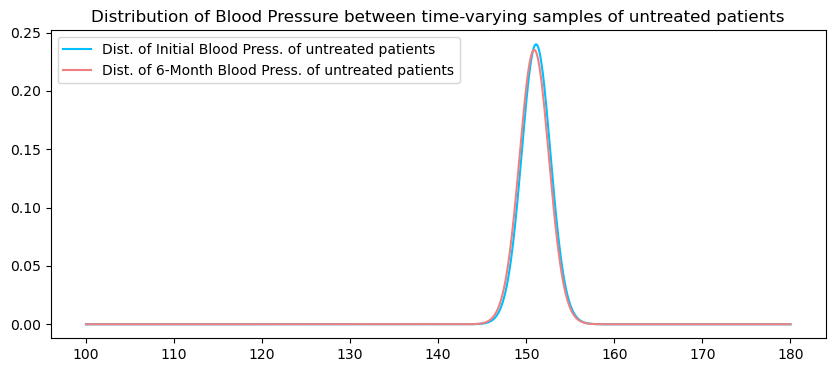

p-value = 0.9286242088218923
----------------------------------------------------------------------------------------------------
ЗАКЛУЧОК: Се прифаќа H0, што значи дека НЕ ПОСТОИ разлика помеѓу примероците за P пред и после 6 месеци кај нетретирани пациенти.


In [10]:
# в-3) Заклучете дали постои намалување (или зголемување) на притисокот кај пациенти кои не примиле лек во првиот ден 
#      од мерењето и на крајот од 6 Месеци.

# ХИПОТЕЗА
# H0: НЕ ПОСТОИ РАЗЛИКА помеѓу примероците за P пред и после 6 месеци кај нетретирани пациенти  =>  mean1 = mean2  
# Ha: ПОСТОИ РАЗЛИКА помеѓу примероците за P пред и после 6 месеци кај нетретирани пациенти     =>  mean1 ≠ mean2 
# --------------------------------------------------------------------------------------------------

df1 = df[df["Primil lek ili ne"] == 0]['Merenje 1']
df2 = df[df["Primil lek ili ne"] == 0]['Merenje 2']

mean1 = df1.mean()
mean2 = df2.mean()

std1 = df1.std()
std2 = df2.std()

n = df1.size

std_error1 = std1 / np.sqrt(n)
std_error2 = std2 / np.sqrt(n)

T1 = stats.t(df = n-1, loc = mean1, scale = std_error1)
T2 = stats.t(df = n-1, loc = mean2, scale = std_error2)

xs = np.linspace(100, 180, 1000)
plt.figure(figsize=(10, 4))
plt.plot(xs, T1.pdf(xs), label='Dist. of Initial Blood Press. of untreated patients', color='deepskyblue')
plt.plot(xs, T2.pdf(xs), label='Dist. of 6-Month Blood Press. of untreated patients', color='lightcoral')
plt.title('Distribution of Blood Pressure between time-varying samples of untreated patients')
plt.legend()
plt.show()

statistic, pvalue = stats.ttest_ind(df1, df2, alternative = 'two-sided', equal_var = False)

print('p-value =', pvalue)
print('----------------------------------------------------------------------------------------------------')

if pvalue < 0.05:
    print('ЗАКЛУЧОК: Се отфрла H0 во корист на Ha, што значи дека ПОСТОИ разлика помеѓу примероците за P пред и после 6 месеци кај нетретирани пациенти.')
else:
    print('ЗАКЛУЧОК: Се прифаќа H0, што значи дека НЕ ПОСТОИ разлика помеѓу примероците за P пред и после 6 месеци кај нетретирани пациенти.')


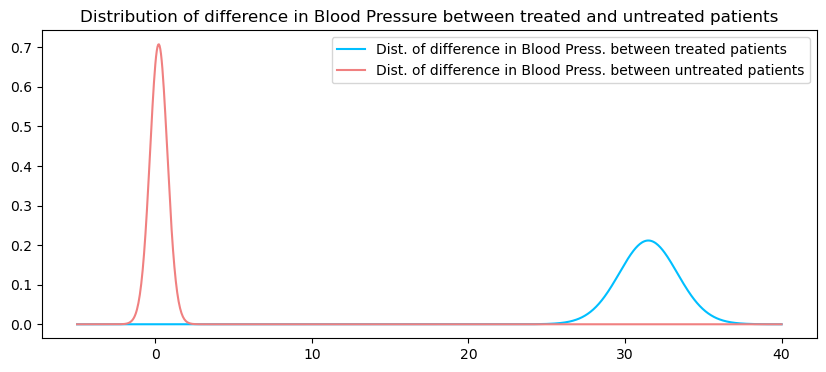

p-value = 7.417937258045858e-23
----------------------------------------------------------------------------------------------------
ЗАКЛУЧОК: Се отфрла H0 во корист на Ha, што значи дека ПОСТОИ разлика за P кај третирани и нетретирани пациенти.


In [11]:
# в-4) Дали постои разлика измеѓу пациентите што примиле лек и пациентите што не примиле лек?

# ХИПОТЕЗА
# H0: НЕ ПОСТОИ РАЗЛИКА помеѓу примероците кај третирани и нетретирани пациенти => mean1 = mean2  
# Ha: ПОСТОИ РАЗЛИКА помеѓу примероците кај третирани и нетретирани пациенти    => mean1 ≠ mean2 
# --------------------------------------------------------------------------------------------------

df1 = df[df["Primil lek ili ne"] == 1]['Razlika']
df2 = df[df["Primil lek ili ne"] == 0]['Razlika']

mean1 = df1.mean()
mean2 = df2.mean()

std1 = df1.std()
std2 = df2.std()

n = df1.size

std_error1 = std1 / np.sqrt(n)
std_error2 = std2 / np.sqrt(n)

T1 = stats.t(df = n-1, loc = mean1, scale = std_error1)
T2 = stats.t(df = n-1, loc = mean2, scale = std_error2)

xs = np.linspace(-5, 40, 1000)
plt.figure(figsize=(10, 4))
plt.plot(xs, T1.pdf(xs), label='Dist. of difference in Blood Press. between treated patients', color='deepskyblue')
plt.plot(xs, T2.pdf(xs), label='Dist. of difference in Blood Press. between untreated patients', color='lightcoral')
plt.title('Distribution of difference in Blood Pressure between treated and untreated patients')
plt.legend()
plt.show()

statistic, pvalue = stats.ttest_ind(df1, df2, alternative = 'two-sided', equal_var = False)

print('p-value =', pvalue)
print('----------------------------------------------------------------------------------------------------')

if pvalue < 0.05:
    print('ЗАКЛУЧОК: Се отфрла H0 во корист на Ha, што значи дека ПОСТОИ разлика за P кај третирани и нетретирани пациенти.')
else:
    print('ЗАКЛУЧОК: Се прифаќа H0, што значи дека НЕ ПОСТОИ разлика за P кај третирани и нетретирани пациенти.')


Евалуација на моделот на ТРЕНИНГ податоци:
Точност:  0.5375

Евалуација на моделот на ТЕСТ податоци:
Точност:  0.55
\ЗАКЛУЧОК: 
Моделот има точност од 0.55 на ТЕСТ податоците што сугерира дека еднодимензионалниот моделот НЕ ГИ ПРЕДВИДУВА добро податоците.



,Merenje 1,Merenje 2,predicted class1,predicted probability1
0,163.419762,156.977602,0,0.456927
1,154.133336,127.545654,0,0.495564
2,144.966965,144.371136,1,0.533756
3,150.545838,150.807626,1,0.510530
4,153.743813,148.645986,0,0.497189


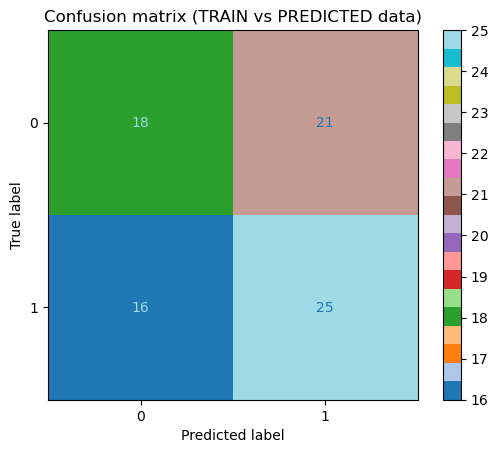

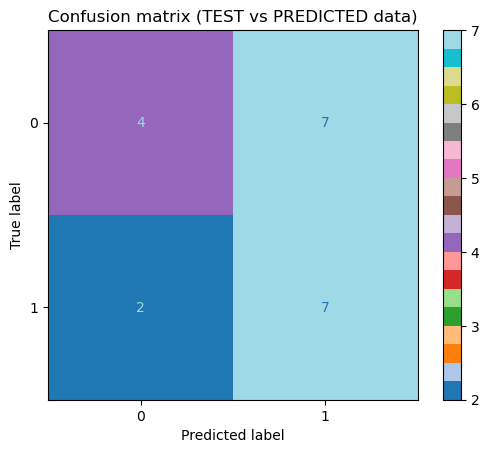

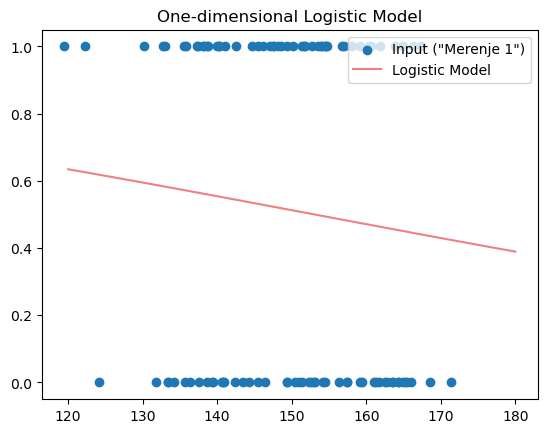

In [12]:
# а-1) Категоризирајте ги пациентите само во однос на првото извршено мерење

y = df['Primil lek ili ne'].to_numpy()
X = df[['Merenje 1']].to_numpy().reshape(-1,1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234) 


# МОДЕЛ ЗА ЛОГИСТИЧКА РЕГРЕСИЈА ########################################################################################

model = LogisticRegression()
model.fit(X_train, y_train)


# TRAIN DATA ###########################################################################################################

y_pred = model.predict(X_train)

cm1 = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot(cmap='tab20')
disp.ax_.set_title('Confusion matrix (TRAIN vs PREDICTED data)')

print('Евалуација на моделот на ТРЕНИНГ податоци:')
print('Точност: ', model.score(X_train, y_train))


# TEST DATA ###########################################################################################################

y_pred = model.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot(cmap='tab20')
disp.ax_.set_title('Confusion matrix (TEST vs PREDICTED data)')

print('\nЕвалуација на моделот на ТЕСТ податоци:')
print('Точност: ', model.score(X_test, y_test))

print(f'\ЗАКЛУЧОК: \nМоделот има точност од {round(model.score(X_test, y_test), 2)} на ТЕСТ податоците што сугерира дека еднодимензионалниот моделот НЕ ГИ ПРЕДВИДУВА добро податоците.\n')


# Категоризирање на податоците од ‘Vtora_zadaca.csv’ според првиот модел ##############################################

df_2 = pd.read_csv('Vtora_zadaca.csv', index_col=0)

X_2 = df_2[['Merenje 1']].to_numpy()

y_pred = model.predict(X_2)
y_prob = model.predict_proba(X_2)

df_2['predicted class1'] = y_pred
df_2['predicted probability1'] = y_prob[:, 1]

display(df_2.head())

xs_log = np.linspace(120, 180, 1000).reshape(-1, 1)
ys_log = model.predict_proba(xs_log)

plt.figure()
plt.scatter(X, y, label = 'Input ("Merenje 1")') 
plt.plot(xs_log, ys_log[:, 1], c = 'lightcoral', label = 'Logistic Model')
plt.title('One-dimensional Logistic Model')
plt.legend()
plt.show()

Евалуација на моделот на ТРЕНИНГ податоци:
Точност:  0.875

Евалуација на моделот на ТЕСТ податоци:
Точност:  0.9

ЗАКЛУЧОК: 
Моделот има точност од 0.9 на ТЕСТ податоците што сугерира дека еднодимензионалниот моделот ДОБРО ГИ ПРЕДВИДУВА податоците.



,Merenje 1,Merenje 2,predicted class2,predicted probability2
0,163.419762,156.977602,0,0.023600
1,154.133336,127.545654,1,0.799867
2,144.966965,144.371136,0,0.177308
3,150.545838,150.807626,0,0.065879
4,153.743813,148.645986,0,0.093078


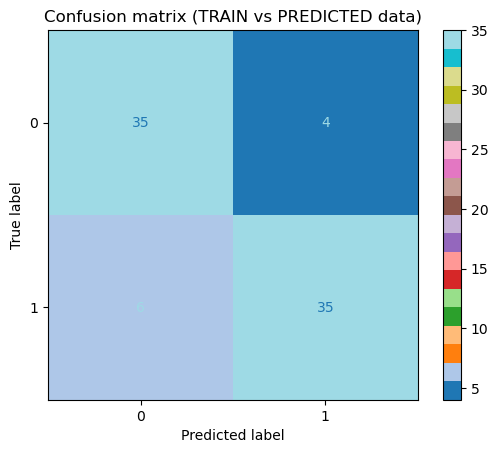

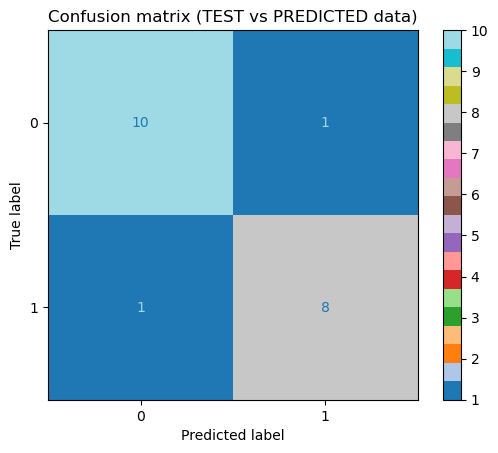

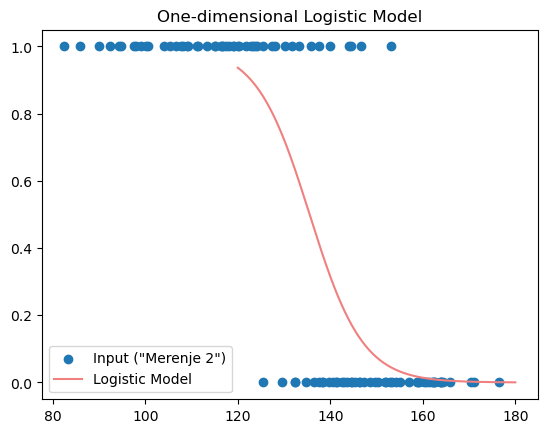

In [13]:
# а-2) Категоризирајте ги пациентите само во однос на второто извршено мерење

y = df['Primil lek ili ne'].to_numpy()
X = df[['Merenje 2']].to_numpy().reshape(-1,1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234) 

# Building the Logistic model based on height and weight
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions, and evaluate the model on TRAIN DATA
y_pred = model.predict(X_train)

cm1 = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot(cmap='tab20')
disp.ax_.set_title('Confusion matrix (TRAIN vs PREDICTED data)')

print('Евалуација на моделот на ТРЕНИНГ податоци:')
print('Точност: ', model.score(X_train, y_train))

# Making predictions, and evaluate the model on TEST DATA
y_pred = model.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot(cmap='tab20')
disp.ax_.set_title('Confusion matrix (TEST vs PREDICTED data)')

print('\nЕвалуација на моделот на ТЕСТ податоци:')
print('Точност: ', model.score(X_test, y_test))

print(f'\nЗАКЛУЧОК: \nМоделот има точност од {round(model.score(X_test, y_test), 2)} на ТЕСТ податоците што сугерира дека еднодимензионалниот моделот ДОБРО ГИ ПРЕДВИДУВА податоците.\n')

#==============================================================================================================
# Категоризирање ги пациентите според вториот модел


df_2 = pd.read_csv('Vtora_zadaca.csv', index_col=0)

X_2 = df_2[['Merenje 2']].to_numpy()

y_pred = model.predict(X_2)
y_prob = model.predict_proba(X_2)

df_2['predicted class2'] = y_pred
df_2['predicted probability2'] = y_prob[:, 1]

display(df_2.head())

xs = np.linspace(120, 180, 1000).reshape(-1, 1)
ys = model.predict_proba(xs)

plt.figure()
plt.scatter(X, y, label = 'Input ("Merenje 2")')  
plt.plot(xs, ys[:, 1], c = 'lightcoral', label = 'Logistic Model')
plt.title('One-dimensional Logistic Model')
plt.legend()
plt.show()

Евалуација на моделот на ТРЕНИНГ податоци:
Точност:  0.9875

Евалуација на моделот на ТЕСТ податоци::
Точност:  1.0

ЗАКЛУЧОК: 
Моделот има точност од 1.0 на ТЕСТ податоците што сугерира дека дводимензионалниот моделот ОДЛИЧНО ГИ ПРЕДВИДУВА податоците.



,Merenje 1,Merenje 2,predicted class3,predicted probability3
0,163.419762,156.977602,0,0.045104
1,154.133336,127.545654,1,0.999868
2,144.966965,144.371136,0,0.008546
3,150.545838,150.807626,0,0.003337
4,153.743813,148.645986,0,0.047994


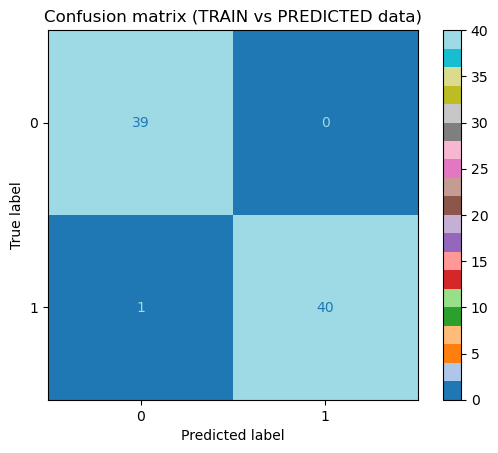

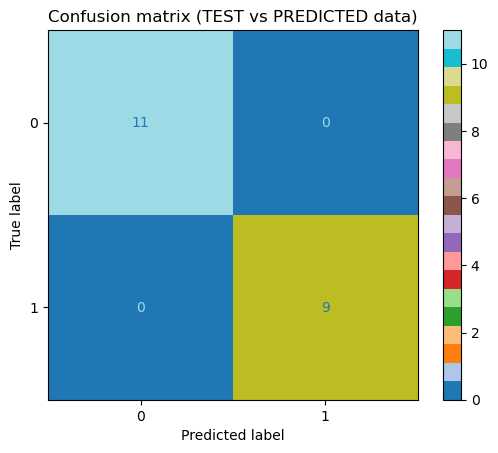

In [14]:
# а-3) Категоризирајте ги пациентите во однос на првото и второто мерење.

y = df['Primil lek ili ne'].to_numpy()
X = df[['Merenje 1', 'Merenje 2',]].to_numpy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234) 

# Building the Logistic model based on height and weight
model = LogisticRegression()
model.fit(X_train, y_train)
#==============================================================================================================

# Making predictions, and evaluate the model on TRAIN DATA
y_pred = model.predict(X_train)

cm1 = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot(cmap='tab20')
disp.ax_.set_title('Confusion matrix (TRAIN vs PREDICTED data)')

print('Евалуација на моделот на ТРЕНИНГ податоци:')
print('Точност: ', model.score(X_train, y_train))

#==============================================================================================================

# Making predictions, and evaluate the model on TEST DATA
y_pred = model.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot(cmap='tab20')
disp.ax_.set_title('Confusion matrix (TEST vs PREDICTED data)')

print('\nЕвалуација на моделот на ТЕСТ податоци::')
print('Точност: ', model.score(X_test, y_test))

print(f'\nЗАКЛУЧОК: \nМоделот има точност од {round(model.score(X_test, y_test), 2)} на ТЕСТ податоците што сугерира дека дводимензионалниот моделот ОДЛИЧНО ГИ ПРЕДВИДУВА податоците.\n')

#==============================================================================================================
# Категоризирање ги пациентите според третиот модел

df_2 = pd.read_csv('Vtora_zadaca.csv', index_col=0)
#display(df_2.head())

y = df['Primil lek ili ne'].to_numpy()
X_2 = df_2[['Merenje 1', 'Merenje 2',]].to_numpy()

# Making predictions, and evaluate the model on NEW DATA

y_pred = model.predict(X_2)
y_prob = model.predict_proba(X_2)

df_2['predicted class3'] = y_pred
df_2['predicted probability3'] = y_prob[:, 1]

display(df_2.head())

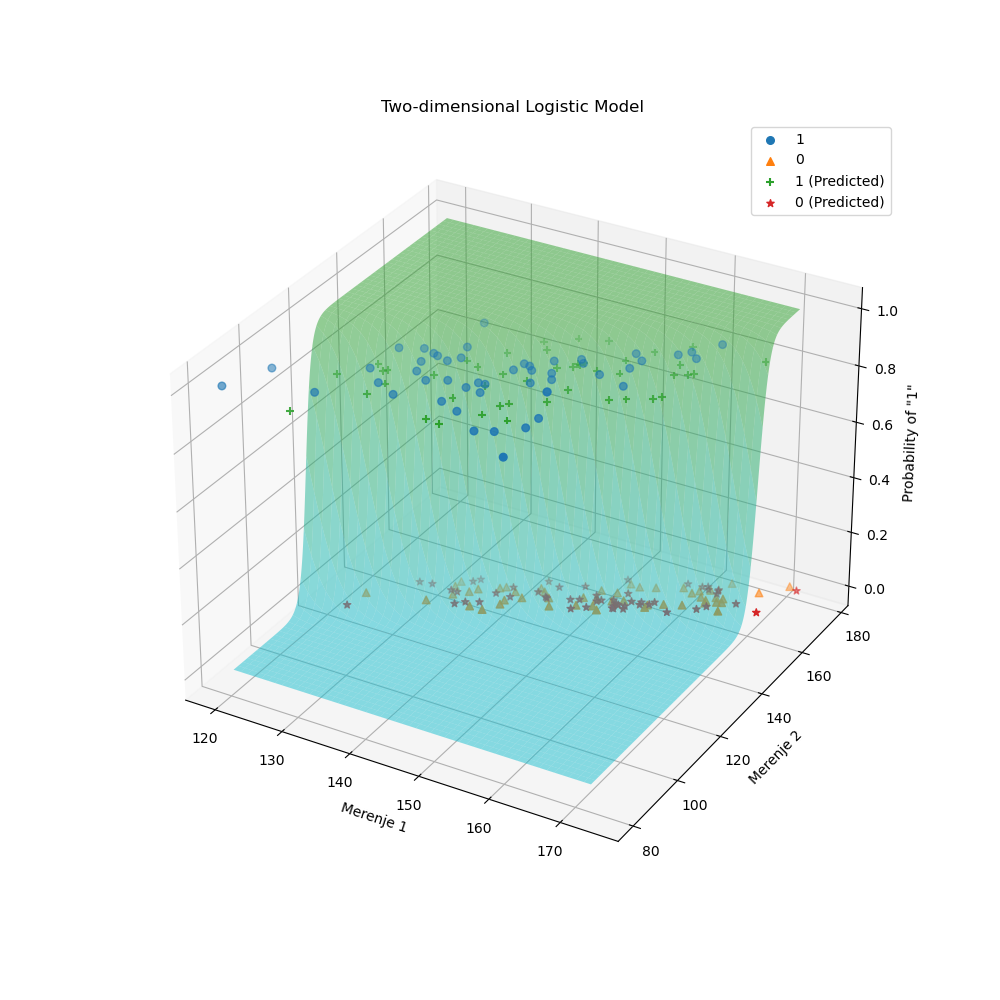

In [15]:
# Plotting the model 

%matplotlib widget
# Color-coding the gender data for the 3D scatter plot
xm = df.loc[df['Primil lek ili ne'] == 1]['Merenje 1']
ym = df.loc[df['Primil lek ili ne'] == 1]['Merenje 2']
zm = df.loc[df['Primil lek ili ne'] == 1]['Primil lek ili ne']

xf = df.loc[df['Primil lek ili ne'] == 0]['Merenje 1']
yf = df.loc[df['Primil lek ili ne'] == 0]['Merenje 2']
zf = df.loc[df['Primil lek ili ne'] == 0]['Primil lek ili ne']

x1 = df_2.loc[df_2['predicted class3'] == 1]['Merenje 1']
y1 = df_2.loc[df_2['predicted class3'] == 1]['Merenje 2']
z1 = df_2.loc[df_2['predicted class3'] == 1]['predicted class3']

x0 = df_2.loc[df_2['predicted class3'] == 0]['Merenje 1']
y0 = df_2.loc[df_2['predicted class3'] == 0]['Merenje 2']
z0 = df_2.loc[df_2['predicted class3'] == 0]['predicted class3']


# Creating the surface for the model
xs = np.linspace(X[:,0].min(), X[:,0].max(), 1000)
ys = np.linspace(X[:,1].min(), X[:,1].max(), 1000)
xs, ys = np.meshgrid(xs, ys)

b_0 = model.intercept_[0]
b_h = model.coef_[0][0]
b_w = model.coef_[0][1]
zs = 1/(1 + np.exp(b_0 + b_h*xs + b_w*ys))


my_cmap = LinearSegmentedColormap.from_list('mycmap', ['tab:cyan', 'tab:green'])

fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_surface(xs, ys, zs, cmap=my_cmap, alpha=0.5)
ax2.scatter(xm, ym, zm, marker='o', s=30, label = '1')
ax2.scatter(xf, yf, zf, marker='^', s=30, label = '0')
ax2.scatter(x1, y1, z1, marker='+', s=30, label = '1 (Predicted)')
ax2.scatter(x0, y0, z0, marker='*', s=30, label = '0 (Predicted)')
ax2.set_xlabel('Merenje 1')
ax2.set_ylabel('Merenje 2')
ax2.set_zlabel('Probability of "1"')  # Probability of receiving the drug 
ax2.legend(loc='upper right')
ax2.set_title('Two-dimensional Logistic Model')
plt.show()

In [16]:
# Додавање на колона "Razlika" за поедноставување на моделите 
df['Razlika'] = df['Merenje 1'] - df['Merenje 2']

In [17]:
print('БОНУС ЗАДАЧА (Дадени се одговори, додека подолу е кодот со моделите и статистиките на кои се базирани одговорите):\n ')
print('Дали може да се категоризираат податоците со помош на линеарна регресија? \n\nОдговор: Tехнички е можно да се користи линеарна или некоја полиномна регресија за бинарна класификација иако тоа не е препорачливо, бидејќи линеарната регресија не е погодна за класификациони задачи кога резултатот што треба да се добие е категорички податок. ')

print('\n-----------------------------------------------------------------------------------------------------------------\n')

print('Кои колони би требало да се искористат за тренирање на моделот во овој случај (на податоците од ‘Prva_zadaca.csv’’? \n\nОдговор: Moже да се направи модел со колоните "Merenje 1" и "Merenje 2", но може и со колоната "Razlika" каде што е пресметана разликата на податоците. Резултатите што се добиваат се скоро исти (со разлика во трета децимала).')

# Конструирајте линеарна регресија за истата категоризација на пациентите од ‘Vtora_zadaca.csv’. 
'''Одговор: Линеарниот модел ги предвиде категориите приближно со Логистичкиот модел.'''

print('\n-----------------------------------------------------------------------------------------------------------------\n')

print('Колку е R2? \n\nОдговор: Во конкретниот случај имаме задоволителна вредност за R-квадрат од 0,72 што сугерира дека моделот е добар, но тоа не мора да значи дека моделот е погоден за бинарна класификација или категоризација на податоци со бинарни исходи. R-квадратот е мерка за тоа колку добро моделот одговара на податоците, но не се однесува директно на соодветноста на моделот во задачи со класификација.')

print('\n-----------------------------------------------------------------------------------------------------------------\n')

print('Дали може да се подобри овој score? \n\nОдговор: Овој score генерално може да се подобри со зголемување на степенот на регресија од линеарна во квадратна или кубна, и според покажаното во кодот се зголемува скорот, но повторно ова значи дека може да дојде до "overfitting" на податоците и моделот да се приспособува на шумот и да не работи добро на нови податоци. За да се ублажи overfitting-от потребно е да се користат соодвети техники како вкрстена валидација, методите за регулација како Ridge regression со fine tuning на параметарот ламбда и други разни методи.')

print('\n-----------------------------------------------------------------------------------------------------------------\n')

print('Од што зависи нашиот score во ова сценарио? \n\nОдговор: Во ова сценарио скорот дефинитивно зависи од степенот на полиномната регресија, во случајов квадратниот модел дава подобар скор од линеарниот и одлично ги класифицира податоците.')

БОНУС ЗАДАЧА (Дадени се одговори, додека подолу е кодот со моделите и статистиките на кои се базирани одговорите):
 
Дали може да се категоризираат податоците со помош на линеарна регресија? 

Одговор: Tехнички е можно да се користи линеарна или некоја полиномна регресија за бинарна класификација иако тоа не е препорачливо, бидејќи линеарната регресија не е погодна за класификациони задачи кога резултатот што треба да се добие е категорички податок. 

-----------------------------------------------------------------------------------------------------------------

Кои колони би требало да се искористат за тренирање на моделот во овој случај (на податоците од ‘Prva_zadaca.csv’’? 

Одговор: Moже да се направи модел со колоните "Merenje 1" и "Merenje 2", но може и со колоната "Razlika" каде што е пресметана разликата на податоците. Резултатите што се добиваат се скоро исти (со разлика во трета децимала).

------------------------------------------------------------------------------------

ЛИНЕАРЕН МОДЕЛ ЗА РЕГРЕСИЈА за класификација на пациентите од ‘Vtora_zadaca.csv’

Determination coefficient: r^2 =  0.7227323385710049
Correlation coefficient:   r   =  0.8501366587619927 

ЗАКЛУЧОК: 
Графикот не покажува линеарна зависнот меѓу мерењата и категоричкиот податок. Линеарниот модел има R^2 = 0.72 што e задоволително решение за ваков тип на регресија. Резидуалите покажуваат патерн што укажува на тоа дека моделот не е соодветен за ваквите податоци.

Assessing the linear model


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     255.4
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           4.74e-29
Time:                        20:14:36   Log-Likelihood:                -8.4405
No. Observations:               

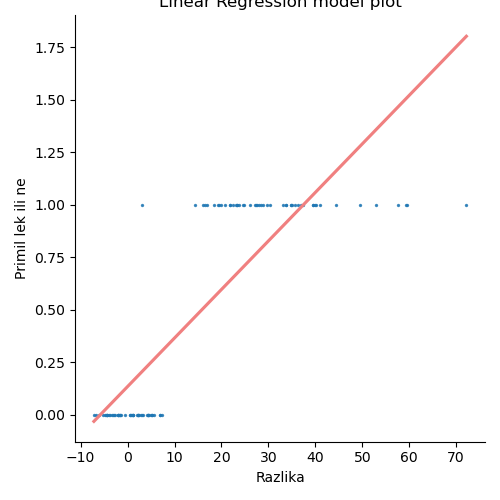

In [18]:
# (ПРВ НАЧИН, земена е разликата на притисоците како една колона во моделот, со цел моделот како еднодимензионален 
# да е поедноставен за понатамошни анализи) 

print('ЛИНЕАРЕН МОДЕЛ ЗА РЕГРЕСИЈА за класификација на пациентите од ‘Vtora_zadaca.csv’')

X = df['Razlika'].to_numpy().reshape(-1, 1)
y = df['Primil lek ili ne'].to_numpy()

model = LinearRegression() 
model.fit(X,y)

#print('Coefficients: ', model.coef_[0])
#print('Intercept:   ', model.intercept_)
#print(f'y_hat = {round(model.coef_[0], 2)}*x + ({round(model.intercept_, 2)})')

sns.lmplot(data = df, x='Razlika', y='Primil lek ili ne', ci=0, line_kws={'color': 'lightcoral'}, scatter_kws={"s": 2})
plt.gca().set_title('Linear Regression model plot')

# Establishing if the model is good
y_pred = model.predict(X)
resid = y - y_pred

r_sq = model.score(X,y)
r = np.sqrt(r_sq)
print('\nDetermination coefficient: r^2 = ', r_sq)
print('Correlation coefficient:   r   = ', r, '\n')
print(f'ЗАКЛУЧОК: \nГрафикот не покажува линеарна зависнот меѓу мерењата и категоричкиот податок. Линеарниот модел има R^2 = {round(model.score(X,y), 2)} што e задоволително решение за ваков тип на регресија. Резидуалите покажуваат патерн што укажува на тоа дека моделот не е соодветен за ваквите податоци.\n')

print('Assessing the linear model\n\n')
X_sm = sm.add_constant(X)
model_lin = sm.OLS(y, X_sm)
results_lin = model_lin.fit()
print(results_lin.summary())

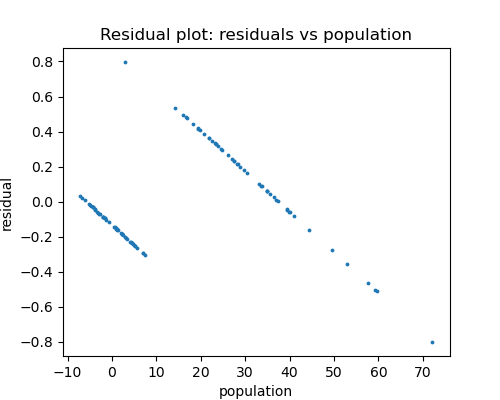

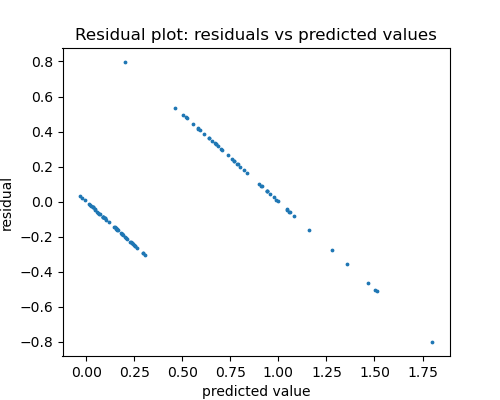

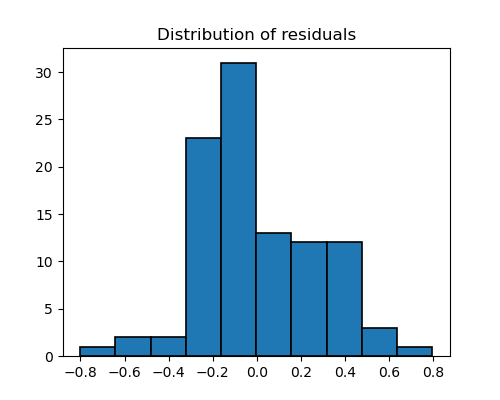

In [19]:
# Residual plot and the distribution of the residuals
plt.figure(figsize=(5, 4))
plt.scatter(X, resid, s=3)
plt.xlabel('population')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs population')
plt.show()

plt.figure(figsize=(5, 4))
plt.scatter(y_pred, resid, s=3)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs predicted values')
plt.show()

plt.figure(figsize=(5, 4))
plt.hist(resid, edgecolor='black', linewidth=1.2)
plt.title('Distribution of residuals')
plt.show()

In [20]:
# Класификација на пациентите од ‘Vtora_zadaca.csv’ според ЛИНЕАРЕН МОДЕЛ

df_2['Razlika'] = df_2['Merenje 1'] - df_2['Merenje 2']
X = df_2['Razlika'].to_numpy().reshape(-1, 1)

y_pred = model.predict(X)

df_2['predicted probability4'] = y_pred
df_2['predicted class4'] = df_2['predicted probability4'].apply(lambda x: 1 if x > 0.5 else 0)
  
df_2['EqualColumns'] = df_2['predicted class3'] == df_2['predicted class4']

count_true = df_2['EqualColumns'].value_counts()[True]

print(f'ЗАКЛУЧОК: \nМоделот за линеарна регресија „точно“ ги класифицира {((count_true / df_2["EqualColumns"].size) * 100)} % од податоците.', )

ЗАКЛУЧОК: 
Моделот за линеарна регресија „точно“ ги класификацира 96.0 % од податоците.


In [21]:
print('НЕЛИНЕАРЕН МОДЕЛ ЗА РЕГРЕСИЈА за истата класификација на пациентите од ‘Vtora_zadaca.csv’\n')

X = df['Razlika'].to_numpy().reshape(-1, 1)
y = df['Primil lek ili ne'].to_numpy()

# Instance the transformer, transform the data
k = 2
trans = PolynomialFeatures(degree = k)
trans.fit(X)
X_quad = trans.transform(X)  # na ovoj nacin dobivame tri koloni, x^0, x^1, x^2, koga k = 2, t.e. avtomatski ni dodava konstanta 1 na mestoto od x^0)

# Build the model
model_quad = LinearRegression(fit_intercept = False) # bidejki PolynomialFeatures dodava konstanta, potrebno e fit_intercept parametarot da e false)
model_quad.fit(X_quad, y)

print('Coefficients:', model_quad.coef_)
print(f'y_hat = {round(model_quad.coef_[0], 2)} + ({round(model_quad.coef_[1], 2)})*x + ({round(model_quad.coef_[2], 2)})*x^2')

y_pred = model_quad.predict(X_quad)
resid = y - y_pred

r_sq = model_quad.score(X_quad,y)
r = np.sqrt(r_sq)
print('\nDetermination coefficient: r^2 = ', r_sq)
print('Correlation coefficient:   r   = ', r, '\n')
print(f'ЗАКЛУЧОК: \nГрафикот не покажува квадратна зависнот меѓу мерењата и категоричкиот податок. Квадратниот модел има R^2 = {round(model.score(X_quad,y), 2)} што e задоволително решение за ваков тип на регресија. Резидуалите покажуваат патерн што укажува на тоа дека моделот не е соодветен за ваквите податоци.\n')

НЕЛИНЕАРЕН МОДЕЛ ЗА РЕГРЕСИЈА за истата класификација на пациентите од ‘Vtora_zadaca.csv’

Coefficients: [ 0.06911816  0.04550876 -0.00049259]
y_hat = 0.07 + (0.05)*x + (-0.0)*x^2

Determination coefficient: r^2 =  0.8576723193431697
Correlation coefficient:   r   =  0.9261059978982804 

ЗАКЛУЧОК: 
Графикот не покажува квадратна зависнот меѓу мерењата и категоричкиот податок. Квадратниот модел има R^2 = 0.72 што e задоволително решение за ваков тип на регресија. Резидуалите покажуваат патерн што укажува на тоа дека моделот не е соодветен за ваквите податоци.



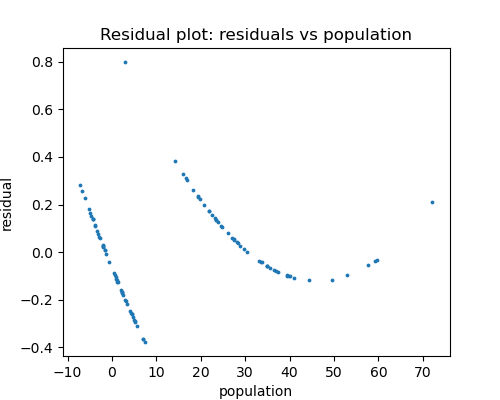

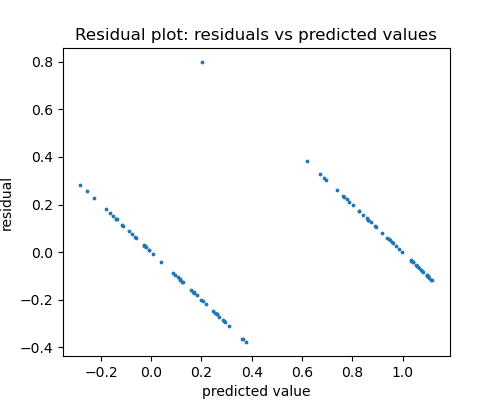

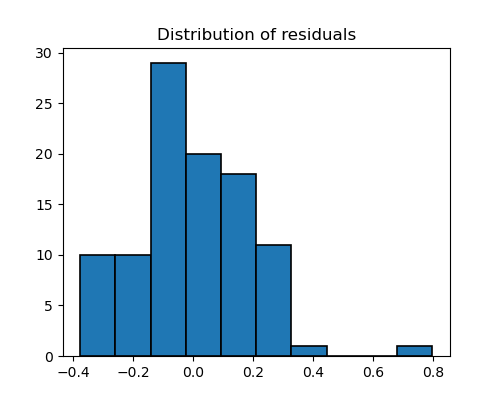

In [22]:
# Residual plot and the distribution of the residuals
plt.figure(figsize=(5, 4))
plt.scatter(X_quad[:, 1], resid, s=3)
plt.xlabel('population')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs population')
plt.show()

plt.figure(figsize=(5, 4))
plt.scatter(y_pred, resid, s=3)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs predicted values')
plt.show()

plt.figure(figsize=(5, 4))
plt.hist(resid, edgecolor='black', linewidth=1.2)
plt.title('Distribution of residuals')
plt.show()

In [23]:
# класификација на пациентите од ‘Vtora_zadaca.csv’ според КВАДРАТЕН МОДЕЛ

X2 = df_2['Razlika'].to_numpy().reshape(-1, 1)

# Instance the transformer, transform the data
k = 2
trans2 = PolynomialFeatures(degree = k)
trans2.fit(X2)
X2_quad = trans2.transform(X2)  # na ovoj nacin dobivame tri koloni, x^0, x^1, x^2, koga k = 2, t.e. avtomatski ni dodava konstanta 1 na mestoto od x^0)

y_pred = model_quad.predict(X2_quad)

df_2['predicted probability5'] = y_pred
df_2['predicted class5'] = df_2['predicted probability5'].apply(lambda x: 1 if x > 0.5 else 0)
  
df_2['EqualColumns2'] = df_2['predicted class3'] == df_2['predicted class5']

count_true2 = df_2['EqualColumns2'].value_counts()[True]

print(f'ЗАКЛУЧОК: \nМоделот за квадратна регресија „точно“ ги категоризира {((count_true2 / df_2["EqualColumns2"].size) * 100)} % од податоците.', )

ЗАКЛУЧОК: 
Моделот за квадратна регресија „точно“ ги категоризира 100.0 % од податоците.


In [24]:
# б) Бонус: (ВТОР НАЧИН, ДВОДИМЕНЗИОНАЛЕН СЛУЧАЈ). 
# Дали може да се категоризираат податоците со помош на линеарна регресија? Кои колони би требало да се искористат за 
# тренирање на моделот во овој случај (на податоците од ‘Prva_zadaca.csv’’? Конструирајте линеарна регресија за истата 
# категоризација на пациентите од ‘Vtora_zadaca.csv’. 
# Колку е R2? 
# Дали може да се подобри овој score? 
# Од што зависи нашиот score во ова сценарио?

# Constructing the model
X = df[['Merenje 1', 'Merenje 2']].to_numpy()
y = df['Primil lek ili ne'].to_numpy()

model = LinearRegression() 
model.fit(X,y)

print('Coefficients: ', model.coef_[0])
print('Intercept:   ', model.intercept_)
print(f'y_hat = {round(model.coef_[0], 2)}*x + ({round(model.intercept_, 2)})')

# Establishing if the model is good
y_pred = model.predict(X)
resid = y - y_pred

r_sq = model.score(X,y)
r = np.sqrt(r_sq)
print('\nDetermination coefficient: r^2 = ', r_sq)
print('Correlation coefficient:   r   = ', r, '\n')
print(f'ЗАКЛУЧОК: \nГрафикот не покажува линеарна зависнот меѓу мерењата и категоричкиот податок. Линеарниот модел има R^2 = {round(model.score(X,y), 2)} што e задоволително решение за ваков тип на регресија. Резидуалите покажуваат патерн што укажува на тоа дека моделот не е соодветен за ваквите податоци.\n')

print('Assessing the linear model\n\n')
X_sm = sm.add_constant(X)
model_lin = sm.OLS(y, X_sm)
results_lin = model_lin.fit()
print(results_lin.summary())

Coefficients:  0.01920774675257177
Intercept:    0.6922891813235972
y_hat = 0.02*x + (0.69)

Determination coefficient: r^2 =  0.7298606012069613
Correlation coefficient:   r   =  0.8543187936636776 

ЗАКЛУЧОК: 
Графикот не покажува линеарна зависнот меѓу мерењата и категоричкиот податок. Линеарниот модел има R^2 = 0.73 што e задоволително решение за ваков тип на регресија. Резидуалите покажуваат патерн што укажува на тоа дека моделот не е соодветен за ваквите податоци.

Assessing the linear model


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     131.0
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           2.70e-28
Time:                        20:14:37   Log-Likelihood:                -7.1383
No. Observations:    

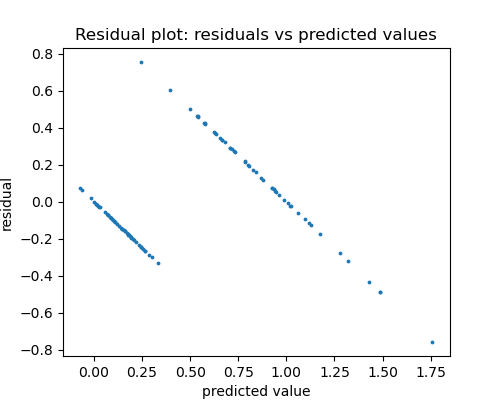

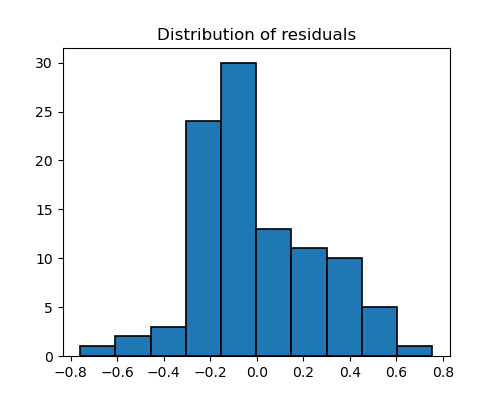

In [25]:
# Residual plot and the distribution of the residuals
plt.figure(figsize=(5, 4))
plt.scatter(y_pred, resid, s=3)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs predicted values')
plt.show()

plt.figure(figsize=(5, 4))
plt.hist(resid, edgecolor='black', linewidth=1.2)
plt.title('Distribution of residuals')
plt.show()

In [26]:
# Категоризација на пациентите од ‘Vtora_zadaca.csv’ според ЛИНЕАРЕН МОДЕЛ, ДВОДИМЕНЗИОНАЛЕН СЛУЧАЈ

X = df_2[['Merenje 1', 'Merenje 2']].to_numpy()

y_pred = model.predict(X)

df_2['predicted probability6'] = y_pred
df_2['predicted class6'] = df_2['predicted probability6'].apply(lambda x: 1 if x > 0.5 else 0)
    
df_2['EqualColumns'] = df_2['predicted class3'] == df_2['predicted class6']

count_true = df_2['EqualColumns'].value_counts()[True]

print(f'ЗАКЛУЧОК: \nМоделот за линеарна регресија „точно“ ги категоризира {((count_true / df_2["EqualColumns"].size) * 100)} % од податоците.', )

ЗАКЛУЧОК: 
Моделот за линеарна регресија „точно“ ги категоризира 96.0 % од податоците.
